### 1. 통계 문제

In [1]:
# 문제 1. 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 
#     빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 
#     그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 
#     빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요

In [2]:
import numpy as np
from scipy import stats

# 표본 데이터
sample_mean = 495
sample_std = 10
n = 25

# 귀무가설의 평균
mu_0 = 500

# t-검정 통계량
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))
df = n - 1 # 자유도

# 양측 검정 p값
p_value = 2 * stats.t.cdf(t_statistic, df=df) if t_statistic < 0 else 2 * (1 - stats.t.cdf(t_statistic, df=df))

# 결과 출력
print(f"t 통계량: {t_statistic:.3f}")
print(f"p-값: {p_value:.4f}")

# 유의수준 0.05와 비교하여 결론
alpha = 0.05
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")

t 통계량: -2.500
p-값: 0.0197
t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


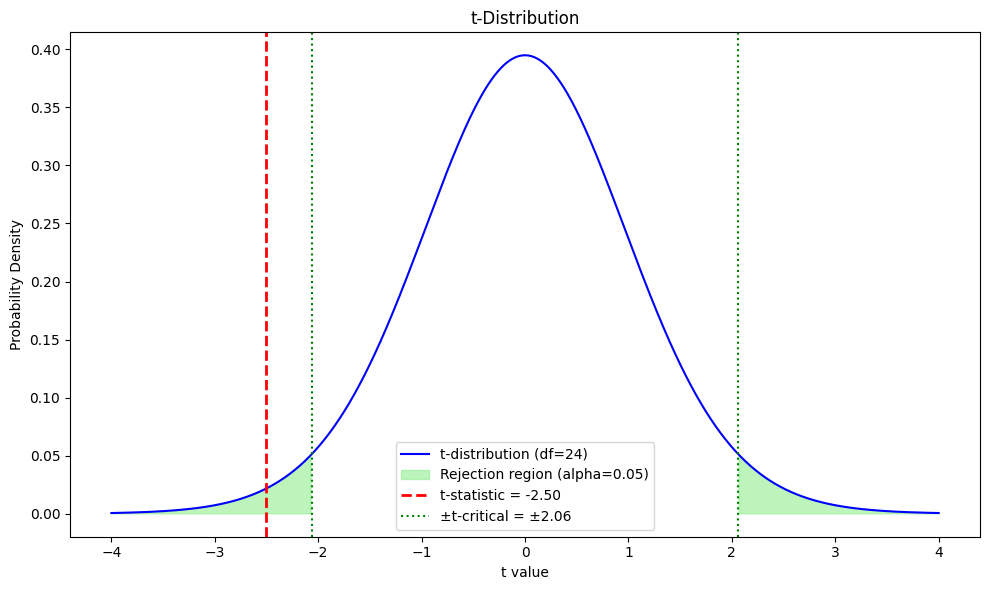

In [3]:
import matplotlib.pyplot as plt

# 문제 2. 분포 시각화

# t 분포 설정
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=df)

# 임계값 (기각역 경계)
t_critical = stats.t.ppf(1-alpha/2, df)

# 시각화
plt.figure(figsize=(10,6))
plt.plot(x,y, label=f't-distribution (df={df})', color='blue')
plt.fill_between(x,y, where=(x <= -t_critical) | (x >= t_critical), color='lightgreen', alpha=0.6, label='Rejection region (alpha=0.05)')
plt.axvline(t_statistic, color='red', linestyle='--', linewidth=2, label=f't-statistic = {t_statistic:.2f}')
plt.axvline(-t_critical, color='green', linestyle=':', label=f'±t-critical = ±{t_critical:.2f}')
plt.axvline(t_critical, color='green', linestyle=':')

# 레이블 및 범례
plt.title('t-Distribution')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# 문제 3. 단일 t 표본 검정

sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]

# 단일 표본 t-검정
mu_0 = 75  # 기존 평균
t_stat, p_value = stats.ttest_1samp(sample_scores, popmean=mu_0)

alpha = 0.05
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")

t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


In [5]:
# 문제 4. 독립 표본 t 검정

# 그룹 A와 B의 체중 감소량 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

# 독립 표본 t-검정 (등분산 가정 여부: equal_var=True or False)
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=True)  # Welch’s t-test

alpha = 0.05
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")


t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


In [6]:
# 문제 5. 대응표본 t 검정

# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

# 대응 표본 t-검정
t_stat, p_value = stats.ttest_rel(before, after)

# 단측 검정: 체중이 감소했는지 → 평균 차이가 양수인지 확인
# p값을 1/2로 줄이고 t > 0일 때만 유의
if t_stat > 0:
    one_tailed_p = p_value / 2
else:
    one_tailed_p = 1 - p_value / 2  # (이 경우는 귀무가설 채택)

# 결과 출력
print(f"t 통계량: {t_stat:.3f}")
print(f"p-값 (단측): {one_tailed_p:.4f}")

alpha = 0.05
# 결과 출력
if one_tailed_p < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {one_tailed_p:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {one_tailed_p:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")

t 통계량: 9.000
p-값 (단측): 0.0000
t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.


In [7]:
# 문제 6. 표본 추출

import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)

C:\Users\Kyungae_Yoon\anaconda3\envs\kayenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Kyungae_Yoon\.cache\kagglehub\datasets\mashlyn\online-retail-ii-uci\versions\3


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [8]:
retail.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [9]:
retail = retail.dropna(subset=['Description', 'Customer ID'])
retail = retail[retail['Quantity']>0]
retail['TotalPrice'] = retail['Quantity'] * retail['Price']

retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [10]:
# 표본추출 (n=1000)
sample = retail['TotalPrice'].sample(n=1000, random_state=42)

# 표본 평균
sample_mean = sample.mean()

# 결과 출력
print(f"표본 평균: {sample_mean:.2f}")

표본 평균: 24.46


In [11]:
sample30 = retail[retail['Country'] == 'United Kingdom']['TotalPrice'].sample(n=30, random_state=20)
sample100 = retail[retail['Country'] == 'United Kingdom']['TotalPrice'].sample(n=100, random_state=20)
sample300 = retail[retail['Country'] == 'United Kingdom']['TotalPrice'].sample(n=300, random_state=20)
sample700 = retail[retail['Country'] == 'United Kingdom']['TotalPrice'].sample(n=700, random_state=20)

# 표본 평균
sample30_mean = sample30.mean()
sample100_mean = sample100.mean()
sample300_mean = sample300.mean()
sample700_mean = sample700.mean()

# 결과 출력
print(f'sample size: 30, Mean TotalPrice: {sample30_mean:.2f}')
print(f'sample size: 100, Mean TotalPrice: {sample100_mean:.2f}')
print(f'sample size: 300, Mean TotalPrice: {sample300_mean:.2f}')
print(f'sample size: 700, Mean TotalPrice: {sample700_mean:.2f}')

sample size: 30, Mean TotalPrice: 9.57
sample size: 100, Mean TotalPrice: 19.70
sample size: 300, Mean TotalPrice: 19.54
sample size: 700, Mean TotalPrice: 21.51


In [12]:
# 문제 7. 신뢰구간

import scipy.stats as stats

# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = retail['TotalPrice'].sample(size, random_state=42)
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")

Sample size: 30, Mean: 16.18, 95% CI: (11.155960412062884, 21.20003958793712)
Sample size: 100, Mean: 19.20, 95% CI: (10.60109952495031, 27.79190047504969)
Sample size: 300, Mean: 24.46, 95% CI: (15.103708100123301, 33.8210918998767)


In [13]:
# 문제 8. 가설검정 t-test

uk = retail[retail['Country'] == 'United Kingdom']['TotalPrice']
germany = retail[retail['Country'] == 'Germany']['TotalPrice']

# 이상치 제거 (선택, 예: 99퍼센트 이내 값만 사용)
uk = uk[uk < uk.quantile(0.99)]
germany = germany[germany < germany.quantile(0.99)]

# 독립표본 t-검정 (등분산 가정 없이)
t_stat, p_value = stats.ttest_ind(uk, germany, equal_var=True)

# 결과 출력
print(f"t 통계량: {t_stat:.3f}")
print(f"p-값: {p_value:.4f}")

# 가설 검정 결과 해석
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

t 통계량: -48.224
p-값: 0.0000
영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


### 2. A/B 테스트

### 문제 9. A/B 테스트 구현 및 결과 해석

In [14]:
from statsmodels.stats.proportion import proportions_ztest

# A/B 테스트 데이터
conversions = np.array([80, 22])        # 구매 수
visitors = np.array([1000, 200])        # 노출 수

# 전환율 계산
conversion_rates = conversions / visitors
print(f"페이지 A 전환율: {conversion_rates[0]*100:.2f}%")
print(f"페이지 B 전환율: {conversion_rates[1]*100:.2f}%")

# Z-test (단측: 페이지 B > 페이지 A)
stat, p_value = proportions_ztest(count=conversions, nobs=visitors, alternative='larger')

# 결과 출력
print(f"\nZ-통계량: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(" 페이지 B의 전환율이 A보다 통계적으로 유의하게 높습니다.")
else:
    print(" 페이지 B의 전환율이 A보다 통계적으로 유의하게 높다고 보기 어렵습니다.")

페이지 A 전환율: 8.00%
페이지 B 전환율: 11.00%

Z-통계량: -1.3888
p-value: 0.9175
 페이지 B의 전환율이 A보다 통계적으로 유의하게 높다고 보기 어렵습니다.


### 1. 결과 해석
- 1.1 페이지 B의 전환율이 높아보이지만, p-value가 0.05보다 크기 때문에 통계적으로 유의한 차이라고 볼 수 없음
- 1.2 즉, 현재의 데이터만으로 페이지 B가 A보다 더 효과적이라는 결론을 내리기 어려움

### 2. 기획자에게의 결론 및 제언
- 2.1 현시점에서 페이지 B의 효과를 확신하기 어려움
-     즉 전환율은 높지만, 통계적으로 우수하다고 보장할 수 없음
- 2.2 표본수를 늘린 후 다시 테스트를 진행하는 것이 바람직함
-     특히 페이지B의 노출 수가 200으로 적어, 통계적 파워가 낮습니다.
-     최소 수천명 단위의 방문자 기반으로 재실험하면 더 명확한 결론을 얻을수 있음
- 2.3 추가적인 실험 또는 보완 설계를 병행할 수 있음
-     사용자의 행동 로그 분석, UX 피드백 수집, A/B 테스트 기간 연장 등도 병행하여 고려할 필요가 있음

### 문제 10. A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.

### A/B 테스트의 결과가 통계적으로 유의하지만 효과의 차이가 매우 작은 경우, 단순히 “통계적으로 유의하다”는 이유만으로 결정을 내리는 것은 위험할 수 있음. 이럴 땐 비즈니스적인 관점에서 효과의 크기(실질적인 차이), 비용 대비 효율, 유지보수 리소스 등을 종합적으로 고려할 필요가 있음.

### 사례: 여행 스타트업의 구매 전환율 개선
- 페이지 A: 전환율 5.00%
- 페이지 B: 전환율 5.25%

- Z-test 결과: p-value = 0.02 → 통계적으로 유의
- 차이: 0.25%포인트 향상 (5.25% vs 5.00%)

### 분석
- 통계적으로는 유의하지만, 전환율의 차이가 0.25%포인트밖에 되지 않음.
- 하루에 10,000명이 방문한다고 해도, 구매자 수는 500명 vs 525명 — 단 25건의 추가 구매뿐.
- 만약 페이지 B가 개발 유지에 더 많은 리소스나 비용이 든다면, 채택하는 것이 손해일 수 있음.

### 의사결정방향
1. 비즈니스 임팩트 평가
- 전환율 0.25% 향상이 연간 매출로 얼마만큼 영향을 주는가?
- 예: 한 건당 수익이 $100이라면, 하루 25건 × 365일 = $912,500의 추가 수익 → 의미 있음.

2. 변경 비용 고려
- 페이지 B 도입/유지에 연간 인건비 $1M이 든다면? → 차익이 없다면 변경 불필요

3. 기술/운영 리스크 고려
- 페이지 B가 새로운 구조나 기술을 사용해 버그 가능성이 높거나 A보다 느리다면, 전환율 상승에도 불구하고 UX 저하 우려로 도입을 보류할 수 있음.

4. 기회비용 고려